Příprava dat

In [379]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats


In [380]:
data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Normálnost dat pro TOEFL skore

In [381]:
print(data['TOEFL Score'].mean())
print(data['TOEFL Score'].median())

107.41
107.0


<Axes: xlabel='TOEFL Score', ylabel='Count'>

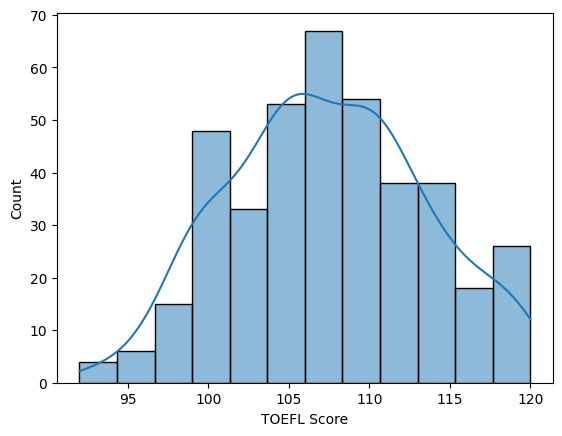

In [382]:
sns.histplot(data=data, x="TOEFL Score", kde=True)

Nulová hypotéza: TOEFL Score v našem souboru mají normální rozdělení.
Alternativní hypotéza: TOEFL Score v našem souboru nemají normální rozdělení.

In [383]:
stats.normaltest(data['TOEFL Score'])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Zamítáme nulovou hypotézu, tj. TOEFL Score  nemá normální rozdělení.

Testování hypotéz
Data si rozdělíme do samostatných tabulek.

In [384]:
data = data.reset_index()
data["Research"].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

In [385]:
data_research_1 = data[data["Research"] == 1]
data_research_0 = data[data["Research"] == 0]

In [386]:
data_research_1['GRE Score'].mean()


322.85388127853884

In [387]:
data_research_0['GRE Score'].mean()

309.49171270718233

In [388]:
stats.normaltest(data_research_1['GRE Score'])

NormaltestResult(statistic=10.539299481397224, pvalue=0.005145412486026274)

In [389]:
stats.normaltest(data_research_0['GRE Score'])

NormaltestResult(statistic=0.9962407495635873, pvalue=0.6076717821415273)

Výběr testu provedeme na základě následujících informací:

máme dva soubory,
chceme porovat jejich rozdělení,
data nejsou párová (jsou to dvě různé skupiny lidí).
Budeme mít následující hypotézy:

H0: Existuje statisticky významný rozdíl v GRE skore mezi skupinami studentů kteří mají a nemají zkúšenost s    výzkumem
H1: Ne existuje statisticky významný rozdíl v GRE skore mezi skupinami studentů kteří mají a nemají zkúšenost s výzkumem

In [390]:
stats.mannwhitneyu(data_research_1["GRE Score"], data_research_0["GRE Score"])


MannwhitneyuResult(statistic=33514.0, pvalue=1.1433386421648098e-32)

Výsledkem je, že na hladině významnosti 5 % zamítáme H0, tj. neprokázali jsme, že by výsledky těch dvou skupin měly významný rozdíl.

Korelace

In [391]:
data_korelace=data[['GRE Score','TOEFL Score']]
data_korelace.corr()


,GRE Score,TOEFL Score
GRE Score,1.000000,0.835977
TOEFL Score,0.835977,1.000000


Hodnoty 0.84 znamenají přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.

In [392]:
data.corr()

,index,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
index,1.000000,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
Serial No.,1.000000,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: xlabel='Chance of Admit ', ylabel='CGPA'>

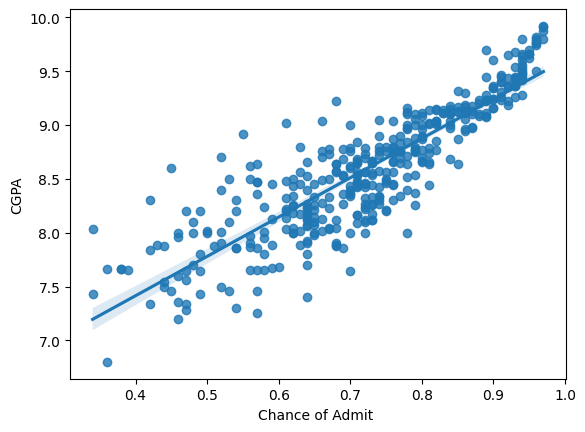

In [393]:
sns.regplot(data, x="Chance of Admit ", y="CGPA")

Vysvětlovaná proměnná

<Axes: xlabel='Chance of Admit '>

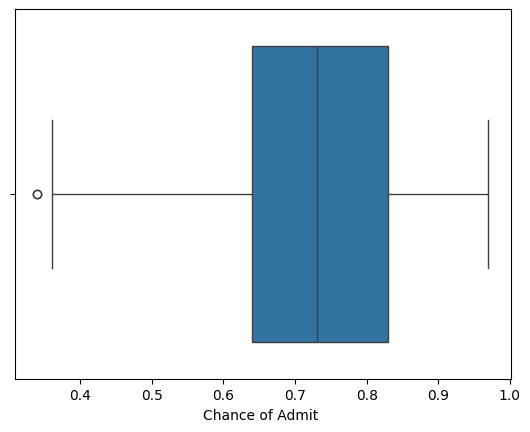

In [394]:
sns.boxplot(data, x="Chance of Admit ")

<Axes: xlabel='Chance of Admit '>

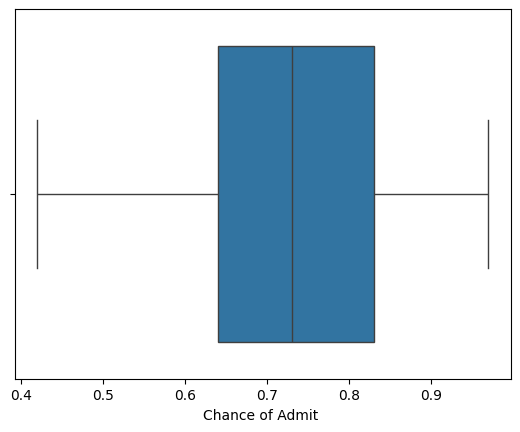

In [395]:
data = data[data["Chance of Admit "] > 0.4]
sns.boxplot(data, x="Chance of Admit ")

Lineární regrese

In [396]:
data.columns

Index(['index', 'Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [397]:
data = data.rename(columns={'GRE Score': 'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'UR', 'LOR ':'LOR', 'Chance of Admit ':'ChanceOfAdmit'})
data.head()

,index,Serial No.,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [398]:
#from statsmodels.stats.outliers_influence import OLSInfluence

formula = "ChanceOfAdmit ~GRE + TOEFL + UR + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     227.6
Date:                Fri, 10 May 2024   Prob (F-statistic):          1.39e-132
Time:                        21:55:07   Log-Likelihood:                 550.21
No. Observations:                 393   AIC:                            -1084.
Df Residuals:                     385   BIC:                            -1053.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1734      0.120     -9.815      0.000      -1.408      -0.938
GRE            0.0019      0.001      3.344      0.001       0.001       0.003
TOEFL          0.0026      0.001      2.500      0.013       0.001       0.005
UR             0.0071      0.005      1.571      0.117      -0.002       0.016
SOP            0.0018      0.005      0.325      0.745      -0.009       0.012
LOR            0.0205      0.005      3.911      0.000       0.010       0.031
CGPA           0.1058      0.012      8.869      0.000       0.082       0.129
Research       0.0221      0.008      2.917      0.004       0.007       0.037
==============================================================================
Omnibus:                       98.938   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.734
Skew:                          -1.246   Prob(JB):                     2.38e-52
Kurtosis:                       5.882   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vidíme, že náš model má koeficient determinace R2 0.805, dokáže tedy vysvětlit přibližně 80% variability šance na přijetí.
Hodnoty koeficientů LOR a CGPA ukazují největši vliv na šance na přijetí.

In [399]:
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,index,Serial No.,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,ChanceOfAdmit,Cook Distance
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000291
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000948
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002084
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001665
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000071


<Axes: xlabel='Cook Distance', ylabel='Count'>

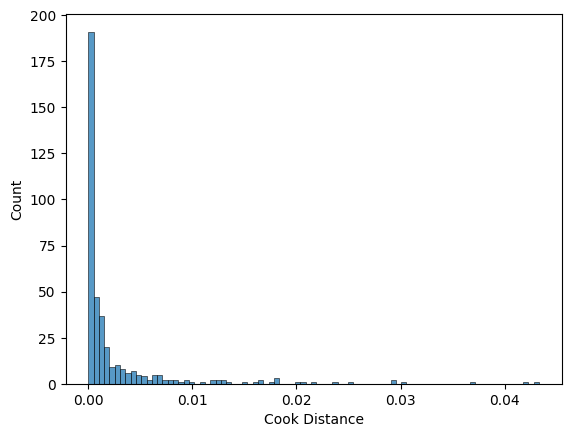

In [403]:
sns.histplot(data=data, x="Cook Distance")

In [411]:
data = data[data['Cook Distance'] < 0.01]

<Axes: xlabel='Cook Distance', ylabel='Count'>

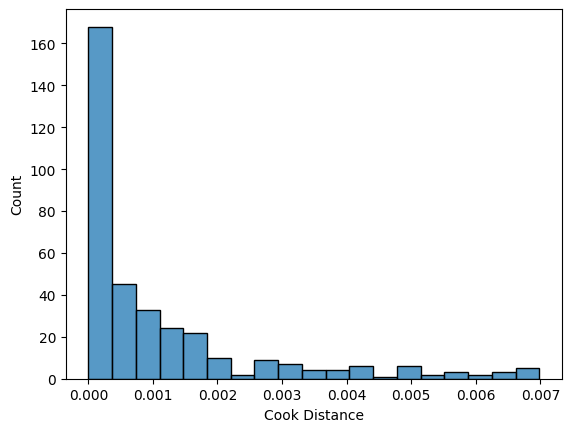

In [412]:
sns.histplot(data=data, x="Cook Distance")